In [32]:
import numpy as np
import cv2

img = cv2.imread('image/image.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.medianBlur(gray, 25) #cv2.bilateralFilter(gray,10,50,50)

minDist = 100
param1 = 30 #500
param2 = 40 #200 #smaller value-> more false circles
minRadius = 5
maxRadius = 100 #10

# docstring of HoughCircles: HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)

# Show result for testing:
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:

# Load image, grayscale, median blur, Otsus threshold
image = cv2.imread('image/im1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 11)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Morph open 
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)

# Find contours and filter using contour area and aspect ratio
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    area = cv2.contourArea(c)
    if len(approx) > 5 and area > 1000 and area < 500000:
        ((x, y), r) = cv2.minEnclosingCircle(c)
        cv2.circle(image, (int(x), int(y)), int(r), (36, 255, 12), 2)

cv2.imshow('thresh', thresh)
cv2.imshow('opening', opening)
cv2.imshow('image', image)
cv2.waitKey()     

-1

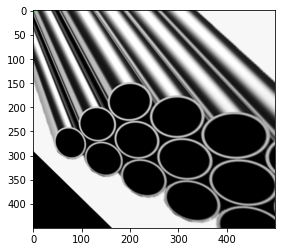

In [59]:
#perspective transformation
#https://medium.com/analytics-vidhya/opencv-perspective-transformation-9edffefb2143


import cv2
from operator import itemgetter
from glob import glob
import matplotlib.pyplot as plt


paper = cv2.imread('image/im1.png')
# Coordinates that you want to Perspective Transform
pts1 = np.float32([[219,209],[612,80],[380,593],[685,271]])

# Size of the Transformed Image
pts2 = np.float32([[0,0],[500,0],[0,400],[500,400]])

for val in pts1:
    cv2.circle(paper,(val[0],val[1]),5,(0,255,0),-1)
    
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(paper,M,(500,450))
plt.imshow(dst)

In [25]:
#Affine Transformation
#https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html

from __future__ import print_function
import cv2 as cv
import numpy as np



src = cv.imread('image/im1.png')
if src is None:
    print('Could not open or find the image:', args.input)
    exit(0)
    
srcTri = np.array( [[0, 0], [src.shape[1] - 1, 0], [0, src.shape[0] - 1]] ).astype(np.float32)
dstTri = np.array( [[0, src.shape[1]*0.33], [src.shape[1]*0.85, src.shape[0]*0.25], [src.shape[1]*0.15, src.shape[0]*0.7]] ).astype(np.float32)
warp_mat = cv.getAffineTransform(srcTri, dstTri)
warp_dst = cv.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))

# Rotating the image after Warp
center = (warp_dst.shape[1]//2, warp_dst.shape[0]//2)
angle = -50
scale = 0.6
rot_mat = cv.getRotationMatrix2D( center, angle, scale )
warp_rotate_dst = cv.warpAffine(warp_dst, rot_mat, (warp_dst.shape[1], warp_dst.shape[0]))

cv.imshow('Source image', src)
cv.imshow('Warp', warp_dst)
cv.imshow('Warp + Rotate', warp_rotate_dst)
cv.waitKey()


-1